<a href="https://colab.research.google.com/github/minsminsKR/esports_hackathon/blob/main/%ED%95%B4%EC%BB%A4%ED%86%A4_1%ED%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/231202~04_lol_해커톤/'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive/


# 데이터 통계분석

In [ ]:
df = pd.read_csv(path+"data/data.csv")

# 필요없는 칼럼 제거
df = df.drop(columns = ["gametime"])
df.head()
# tfkill, fbkill = 이진 데이터

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,ftkill,fbkill,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,win
0,1,4440.037673,4638.195073,1.093321,1.147987,2,0,1,2038.606795,0,0,6,0.737992,6.289874,20.773096,1
1,1,3867.484106,5718.122750,1.147987,1.093321,3,0,0,1978.878879,2,0,5,0.737992,8.364616,21.019093,0
2,1,3608.001771,4517.293883,1.375259,1.178794,1,0,1,2264.121406,1,0,7,0.471517,5.467996,23.536577,1
3,0,3614.617789,4500.515722,1.178794,1.375259,2,1,0,1927.678986,1,0,4,0.510811,4.833688,22.200611,0
4,1,4021.780635,4082.898206,0.851895,0.793144,3,1,1,2032.958218,1,0,7,0.734392,7.256807,26.320621,1


In [ ]:
# df = df.drop(columns = ["gametime"])
df.info()

# 변수들 타입은 int64이며 총 15개의 변수, 모두 결측치가 없다.
# float64 실수값, int64 정수값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   baron                    1560 non-null   int64  
 1   damagePerMinute          1560 non-null   float64
 2   dealttakenPerMinute      1560 non-null   float64
 3   killsPerMinute           1560 non-null   float64
 4   deathsPerMinute          1560 non-null   float64
 5   dragon                   1560 non-null   int64  
 6   ftkill                   1560 non-null   int64  
 7   fbkill                   1560 non-null   int64  
 8   goldPerMinute            1560 non-null   float64
 9   herald                   1560 non-null   int64  
 10  elderdragon              1560 non-null   int64  
 11  turretkills              1560 non-null   int64  
 12  visionwardsbuyPerMinute  1560 non-null   float64
 13  visionScorePerMinute     1560 non-null   float64
 14  csPerMinute             

In [ ]:
df.head()

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,ftkill,fbkill,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,win
0,1,4440.037673,4638.195073,1.093321,1.147987,2,0,1,2038.606795,0,0,6,0.737992,6.289874,20.773096,1
1,1,3867.484106,5718.122750,1.147987,1.093321,3,0,0,1978.878879,2,0,5,0.737992,8.364616,21.019093,0
2,1,3608.001771,4517.293883,1.375259,1.178794,1,0,1,2264.121406,1,0,7,0.471517,5.467996,23.536577,1
3,0,3614.617789,4500.515722,1.178794,1.375259,2,1,0,1927.678986,1,0,4,0.510811,4.833688,22.200611,0
4,1,4021.780635,4082.898206,0.851895,0.793144,3,1,1,2032.958218,1,0,7,0.734392,7.256807,26.320621,1


In [ ]:
# 기초통계
df.describe()

# 이진 데이터는 평균 %로 퍼블 땀
# std: 각 변수의 표준편차. 표준편차는 데이터가 평균으로부터 얼마나 퍼져있는지를 나타냄.
# min, 25%, 50%, 75%, max: 이들은 각 변수의 최솟값, 1사분위수, 중앙값(자료를 작은값부터 나열했을때 가운데), 3사분위수, 최댓값

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,ftkill,fbkill,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,win
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.00000
mean,0.314103,3757.837817,4621.017467,1.294976,1.299480,1.232692,0.387821,0.494231,2284.727201,0.739103,0.005769,3.998077,0.663032,5.380862,22.245218,0.50000
std,0.554930,1869.865988,1784.823954,0.868995,0.871218,1.222657,0.487410,0.500127,687.942000,0.755062,0.075760,3.091402,0.376017,2.752783,5.418509,0.50016
min,0.000000,0.000000,19.430562,0.000000,0.000000,0.000000,0.000000,0.000000,1276.301999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2625.279286,3551.379358,0.737699,0.740875,0.000000,0.000000,0.000000,1854.783810,0.000000,0.000000,1.000000,0.476416,4.678257,21.467135,0.00000
50%,0.000000,3269.728128,4197.300126,1.045749,1.051336,1.000000,0.000000,0.000000,2088.259237,1.000000,0.000000,4.000000,0.733466,6.096304,23.936763,0.50000
75%,1.000000,4017.440145,4922.723293,1.469798,1.470255,2.000000,1.000000,1.000000,2309.962762,1.000000,0.000000,6.000000,0.925270,7.212291,25.693300,1.00000
max,3.000000,14406.518766,15895.732449,5.038774,5.038774,5.000000,1.000000,1.000000,4458.327255,2.000000,1.000000,13.000000,1.547863,11.612324,31.194814,1.00000


In [ ]:
len(df)

1560

In [ ]:
df.describe()

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,ftkill,fbkill,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,win
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.00000
mean,0.314103,3757.837817,4621.017467,1.294976,1.299480,1.232692,0.387821,0.494231,2284.727201,0.739103,0.005769,3.998077,0.663032,5.380862,22.245218,0.50000
std,0.554930,1869.865988,1784.823954,0.868995,0.871218,1.222657,0.487410,0.500127,687.942000,0.755062,0.075760,3.091402,0.376017,2.752783,5.418509,0.50016
min,0.000000,0.000000,19.430562,0.000000,0.000000,0.000000,0.000000,0.000000,1276.301999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2625.279286,3551.379358,0.737699,0.740875,0.000000,0.000000,0.000000,1854.783810,0.000000,0.000000,1.000000,0.476416,4.678257,21.467135,0.00000
50%,0.000000,3269.728128,4197.300126,1.045749,1.051336,1.000000,0.000000,0.000000,2088.259237,1.000000,0.000000,4.000000,0.733466,6.096304,23.936763,0.50000
75%,1.000000,4017.440145,4922.723293,1.469798,1.470255,2.000000,1.000000,1.000000,2309.962762,1.000000,0.000000,6.000000,0.925270,7.212291,25.693300,1.00000
max,3.000000,14406.518766,15895.732449,5.038774,5.038774,5.000000,1.000000,1.000000,4458.327255,2.000000,1.000000,13.000000,1.547863,11.612324,31.194814,1.00000


<Axes: >

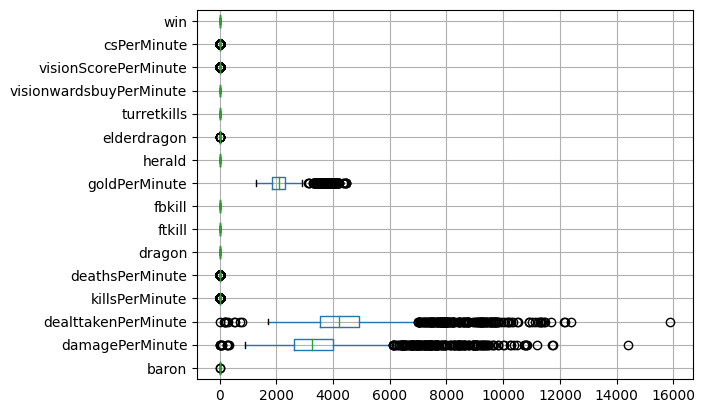

In [ ]:
# 박스플롯?
# orient="h"
# 표준화 전
# shuffled = original.sample(frac=1).reset_index(drop=True) 셔플
df.boxplot(vert=False)

In [ ]:
y = df['win']
X = df.drop(columns=['win'])

# 'ftkill' 피처를 제외한 나머지 피처들을 표준화합니다. tfkill은 0/1 이진이기때문에 표준화 하면 안됩니다이
scaler = StandardScaler()

# 'ftkill'을 제외한 피처들에 대한 scaler를 학습
scaler.fit(X.drop(columns=['ftkill']))

# 'ftkill'을 제외한 피처들을 표준화합니다.
# 'ftkill' 피처를 다시 추가
X_scaled = scaler.transform(X.drop(columns=['ftkill']))

# 데이터프레임화
X_scaled_df = pd.DataFrame(X_scaled, columns=X.drop(columns=['ftkill']).columns)
X_scaled_df = pd.concat([X_scaled_df, X['ftkill']], axis=1)

## tfkill은 이진데이터

In [ ]:
# 결측치 제거 <- 표준화 한 이후 10여개의 결측치가 발생 (이유를 몰겠음. 일단 몇개없으니 그냥 제거)
# damagePerMinute 0이 있음을 확인 후 1000보다 낮은 것들 제거 (= 다시하기 게임)
df.drop(index = [462, 463, 498, 499, 778, 779, 994, 995, 1088, 1089, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559])

y = df['win']
X = df.drop(columns=['win'])

# 'ftkill'과 'fbkill'을 제외한 피처들을 표준화합니다. <- 이진데이터라서
scaler = StandardScaler()
scaler.fit(X.drop(columns=['ftkill', 'fbkill']))
X_scaled = scaler.transform(X.drop(columns=['ftkill', 'fbkill']))

# 데이터프레임화
X_scaled_df = pd.DataFrame(X_scaled, columns=X.drop(columns=['ftkill', 'fbkill']).columns)
X_scaled_df = pd.concat([X_scaled_df, X[['ftkill', 'fbkill']]], axis=1)

In [ ]:
# 결측치 확인
X_scaled_df.isna().sum()

baron                      0
damagePerMinute            0
dealttakenPerMinute        0
killsPerMinute             0
deathsPerMinute            0
dragon                     0
goldPerMinute              0
herald                     0
elderdragon                0
turretkills                0
visionwardsbuyPerMinute    0
visionScorePerMinute       0
csPerMinute                0
ftkill                     0
fbkill                     0
dtype: int64

In [ ]:
X_scaled_df

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,ftkill,fbkill
0,1.236404,0.364956,0.009627,-0.232130,-0.173942,0.627775,-0.357878,-0.979177,-0.076176,0.647785,0.199415,0.330321,-0.271771,0,1
1,1.236404,0.058657,0.614883,-0.169203,-0.236709,1.445929,-0.444727,1.670461,-0.076176,0.324204,0.199415,1.084252,-0.226357,0,0
2,1.236404,-0.080158,-0.058133,0.092416,-0.138570,-0.190378,-0.029962,0.345642,-0.076176,0.971367,-0.509489,0.031663,0.238400,0,1
3,-0.566204,-0.076618,-0.067536,-0.133741,0.087009,0.627775,-0.519176,0.345642,-0.076176,0.000622,-0.404957,-0.198835,-0.008235,1,0
4,1.236404,0.141201,-0.301594,-0.510041,-0.581368,1.445929,-0.366091,0.345642,-0.076176,0.971367,0.189840,0.681691,0.752367,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,-0.566204,-0.382102,0.542652,-0.127053,0.477821,-1.008531,-0.434621,0.345642,-0.076176,-0.646541,1.061533,0.031733,-0.502086,0,1
1556,-0.566204,-0.237298,-0.218322,0.019479,-0.565089,-0.190378,-0.255558,0.345642,-0.076176,0.000622,0.383855,0.603374,0.029161,1,0
1557,-0.566204,0.021631,-0.012957,-0.561350,0.014258,0.627775,-0.499731,0.345642,-0.076176,-0.322959,1.189252,0.734588,0.317928,0,1
1558,3.039011,-0.534814,-0.188385,-0.641291,-0.508178,1.445929,-0.524860,0.345642,-0.076176,0.000622,0.642360,2.264421,0.617047,0,0


In [ ]:
# 표준화 데이터 (평균을 0 분산을1로 만든다)
# -값 나와도 괜찮음
X_scaled_df.head()

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,ftkill,fbkill
0,1.236404,0.364956,0.009627,-0.232130,-0.173942,0.627775,-0.357878,-0.979177,-0.076176,0.647785,0.199415,0.330321,-0.271771,0,1
1,1.236404,0.058657,0.614883,-0.169203,-0.236709,1.445929,-0.444727,1.670461,-0.076176,0.324204,0.199415,1.084252,-0.226357,0,0
2,1.236404,-0.080158,-0.058133,0.092416,-0.138570,-0.190378,-0.029962,0.345642,-0.076176,0.971367,-0.509489,0.031663,0.238400,0,1
3,-0.566204,-0.076618,-0.067536,-0.133741,0.087009,0.627775,-0.519176,0.345642,-0.076176,0.000622,-0.404957,-0.198835,-0.008235,1,0
4,1.236404,0.141201,-0.301594,-0.510041,-0.581368,1.445929,-0.366091,0.345642,-0.076176,0.971367,0.189840,0.681691,0.752367,1,1


<Axes: >

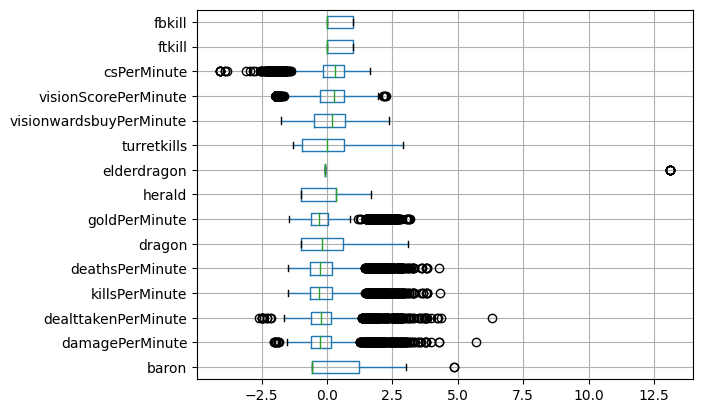

In [ ]:
X_scaled_df.boxplot(vert=False)
# 전처리 후 이상치 12.5이 넘는값.
# 확인해보니 장로 하나를 먹은것이 표시됨 -> 그만큼 중요하다

In [ ]:
# 데이터 프레임에서 장로의 이상치들만 확인하기.
X_scaled_df[X_scaled_df['elderdragon'] > 12]

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,ftkill,fbkill
17,1.236404,-0.356520,-0.274957,-0.249708,-0.691114,3.082235,-0.106425,1.670461,13.127579,1.942112,0.260564,0.483871,0.429776,1,1
303,1.236404,0.727483,0.244064,0.117038,-0.316062,3.082235,0.111214,0.345642,13.127579,1.942112,0.217739,1.129382,0.362460,1,0
1013,3.039011,0.140506,-0.071023,-0.194226,-0.539203,3.082235,-0.069841,0.345642,13.127579,1.942112,1.547685,0.708530,0.259564,0,0
1160,-0.566204,-0.524179,-0.592696,-0.644382,-0.929288,3.082235,-0.644261,0.345642,13.127579,0.971367,1.169881,1.208184,-0.012364,1,1
1210,3.039011,-0.282856,-0.120432,-0.463510,-0.760226,-0.190378,-0.225380,0.345642,13.127579,0.971367,1.203430,0.819121,0.399876,0,0
1391,3.039011,-0.384215,-0.567543,-0.232735,-0.516142,3.082235,0.066332,1.670461,13.127579,1.942112,2.031605,2.168647,0.925634,0,1
1455,1.236404,-0.201814,-0.218799,0.037693,-0.657216,3.082235,0.039237,0.345642,13.127579,1.618530,0.590895,1.138894,0.351992,1,1
1492,3.039011,0.438218,0.191048,-0.258667,-0.493591,1.445929,-0.262054,0.345642,13.127579,0.971367,0.846103,1.491913,0.153677,0,0
1517,-0.566204,0.234806,0.011074,-0.534384,-0.362482,0.627775,-0.409781,0.345642,13.127579,0.000622,1.260403,1.841809,0.579001,1,0


In [ ]:
# 데이터 프레임에서 장로의 이상치들만 확인하기.
# 장로 2마리이상 먹는 게임은 없고,
# 1마리 먹으면 한판 빼고 다 이김 그래서 장로 한번 먹은게 엄청 중요하기에 저런 이상치가 나옴
df[df['elderdragon']==1]

,baron,damagePerMinute,dealttakenPerMinute,killsPerMinute,deathsPerMinute,dragon,ftkill,fbkill,goldPerMinute,herald,elderdragon,turretkills,visionwardsbuyPerMinute,visionScorePerMinute,csPerMinute,win
17,1,3091.406363,4130.425133,1.078051,0.697562,5,1,1,2211.536290,2,1,10,0.760977,6.712428,24.573219,1
303,1,5117.696586,5056.489270,1.396649,1.024209,5,1,0,2361.211744,1,1,10,0.744879,8.488809,24.208579,1
1013,2,4020.480741,4494.294662,1.126249,0.829867,5,0,0,2236.695889,1,1,10,1.244801,7.330665,23.651219,1
1160,0,2778.007181,3563.499017,0.735191,0.490127,5,1,1,1841.655150,1,1,7,1.102786,8.705664,22.178247,1
1210,2,3229.104644,4406.136170,0.892317,0.637370,1,0,0,2129.728337,1,1,7,1.115397,7.635002,24.411256,1
1391,2,3039.637749,3608.378702,1.092795,0.849952,5,0,1,2330.344876,2,1,10,1.426705,11.348765,27.259164,1
1455,1,3380.592971,4230.625151,1.327721,0.727085,5,1,1,2311.711479,1,1,9,0.885147,8.514987,24.151879,1
1492,2,4576.983522,4961.895861,1.070268,0.869593,3,0,0,2104.507245,1,1,7,0.981079,9.486459,23.077652,1
1517,0,4196.752498,4640.776239,0.830748,0.983780,2,1,0,2002.911827,1,1,4,1.136813,10.449338,25.381534,0


In [ ]:
# 장로, 가질수 있는값이 딱 2개. 즉 0회 or 1회
X_scaled_df['elderdragon'].unique() # 데이터의 어떤 종류가 있는지 확인하는 코드

array([-0.07617551, 13.12757911])

# 데이터 시각화

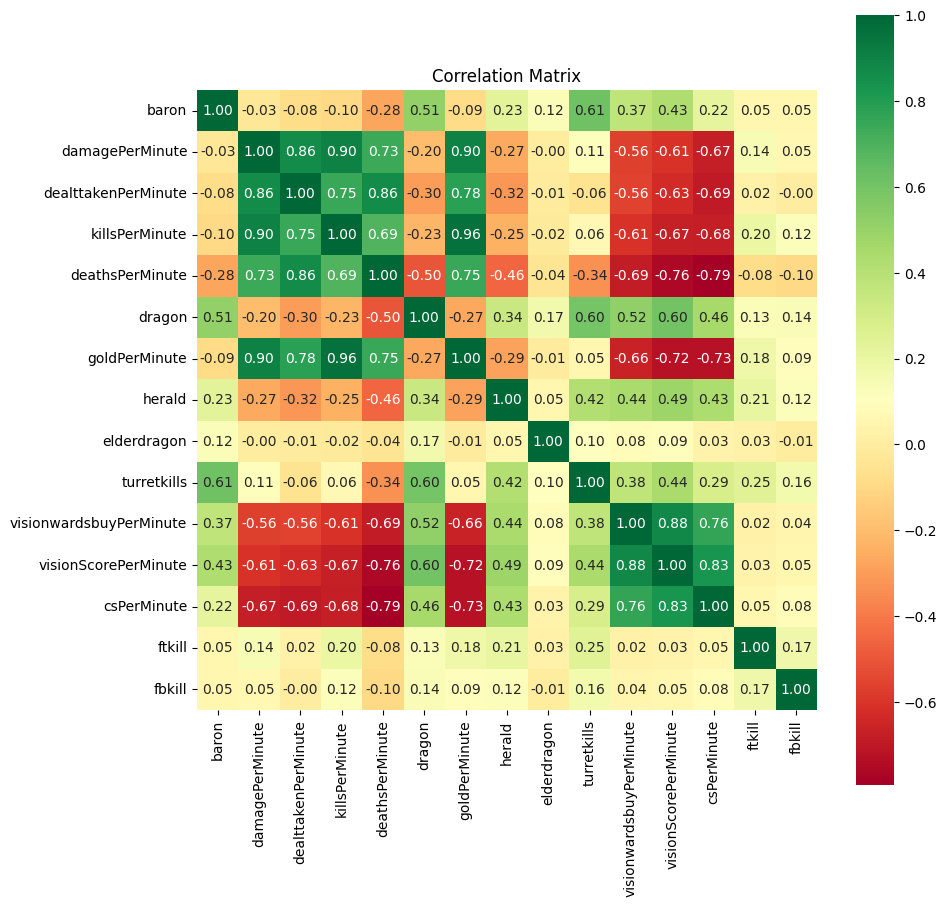

In [ ]:
# 상관계수
correlation = X_scaled_df.corr()
# print(correlation)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", square=True, cmap='RdYlGn') # 소수점 두자리
plt.title('Correlation Matrix')
plt.show()

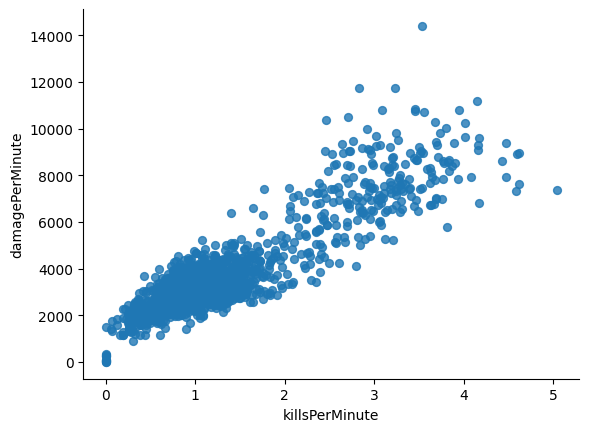

In [ ]:
# 양의 상관관계
df.plot(kind='scatter', x='killsPerMinute', y='damagePerMinute', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

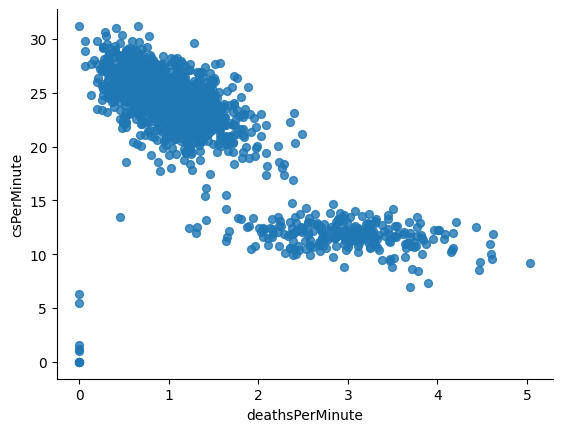

In [ ]:
# 음의 상관관계
df.plot(kind='scatter', x='deathsPerMinute', y='csPerMinute', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

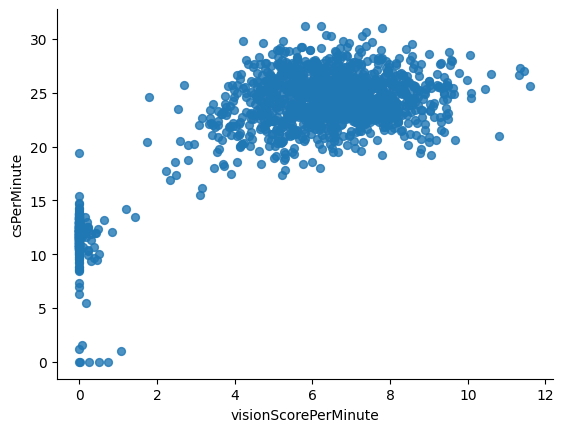

In [ ]:
# 양의 상관관계
# 시야가 잘 잡혀야 cs 수급을(라인전, 스플릿) 안정적으로 가능하다.
df.plot(kind='scatter', x='visionScorePerMinute', y='csPerMinute', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 머신러닝 모델학습

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

print(f'X_train : {len(X_train)}, X_test : {len(X_test)}')
print(f'Y_train : {len(Y_train)}, Y_test : {len(Y_test)}')

X_train : 1092, X_test : 468
Y_train : 1092, Y_test : 468


RandomForest

In [ ]:
# 랜덤포레스트
# 랜덤 포레스트는 여러 개의 결정 트리를 조합하여 예측을 수행하는 앙상블 모델입니다. 이 모델은 다양한 특성을 고려합니다

rf = RandomForestClassifier(n_estimators = 70)

rf.fit(X_train, Y_train)
# 테스트
y_pred = rf.predict(X_test)
# 예측 결과의 정확도
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy: {:.3f} %'.format(accuracy*100))

Test Accuracy: 95.299 %


In [ ]:
# 피처 중요도
# 트리기반 알고리즘에서 제공하는 기능으로 해당 모델 내에서 중요도를 나타냅니다.
# 다른 모델 내에선 다른 결과가 나올 수 있지만 충분히 참고할만 합니다.
feature_importances = rf.feature_importances_

# 피처와 그에 따른 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': X_scaled_df.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 내림차 순으로 중요도를 나타냅니다.
# tfkill은 이진 피쳐이기때문에 다른 변수들과의 연관성 상관관계를 알아봐야합니다.
# deaths, dealttaken 즉 많이 죽거나, 딜 많이 받으면 이길 확률이 높아지느냐? 이것이 아니라
# 피처의 값이 변화할 때 모델의 예측이 크게 변화한다는 것을 의미합니다.
# 솔킬이 낮게 나옴니다. 이는 인게임 상황까지 생각해보아야 할것입니다. 솔킬 이후에 상대방이 오브젝트를 가져가면 결국엔
# 드래곤 혹은 바론을 주게 되는 것이라 패배라는 결과에 크게 영향을 줄겁니다.

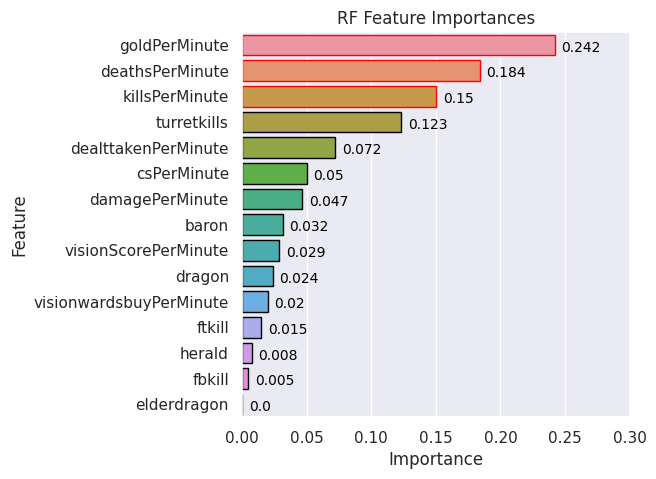

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(5, 5))

# 상위 3개 하이라이트
def kth_largest_number(arr, K):
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse = True)
    return sorted_nums[K-1]

values = importance_df['Importance']
colors = ['black' if (x < kth_largest_number(values,3)) else 'red' for x in values]

barplot = sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'],
            edgecolor = colors)

# 수치 표시
for i, v in enumerate(importance_df['Importance']):
    barplot.text(v + 0.005, i + .25, str(round(v, 3)), color='black', fontweight='light', fontsize=10)

plt.xlim(0, 0.3)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('RF Feature Importances')
plt.show()

# 데이터 불균형 : Elder Dragon을 획득하는 경우가 데이터 셋에서 매우 드물게 발생하면, 모델이이 변수를 통해 많은 정보를 얻지 못할 수 있습니다. 이런 경우, 이 변수의 중요도는 상대적으로 낮게 나타날 수 있습니다.

XGBoost

In [ ]:
import xgboost as xgb
# max_depth: 트리의 최대 깊이를 제한하는 파라미터입니다. 과적합을 방지하고 일반화 성능을 향상시키기 위해 사용됩니다.
# 작은 값일수록 모델이 단순화되고 과적합을 방지할 수 있지만, 너무 작으면 모델이 복잡한 패턴을 학습하지 못할 수 있습니다.
# 보통 5에서 10 사이의 값을 사용합니다.
# n_estimators = 트리개수

xgb = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100)
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy: {:.3f} %'.format(accuracy*100))

Test Accuracy: 95.513 %


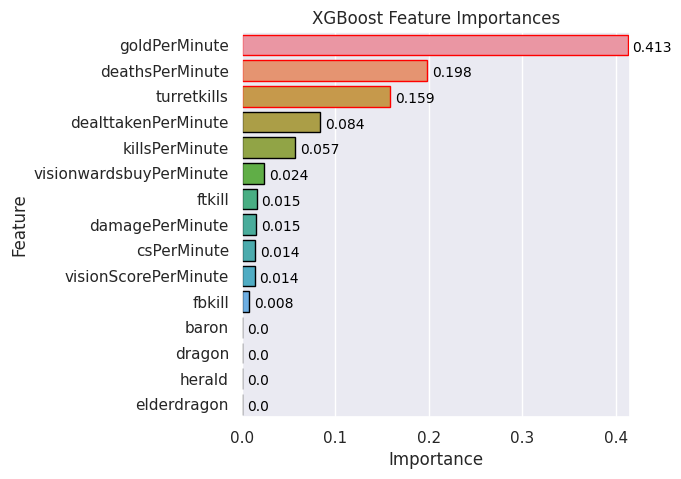

In [ ]:
# xgboost 변수 중요도

feature_importances = xgb.feature_importances_

# 피처와 그에 따른 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': X_scaled_df.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.set(style='darkgrid')
plt.figure(figsize=(5, 5))

# 상위 3개 하이라이트
def kth_largest_number(arr, K):
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse = True)
    return sorted_nums[K-1]

values = importance_df['Importance']
colors = ['black' if (x < kth_largest_number(values,3)) else 'red' for x in values]

barplot = sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'],
            edgecolor = colors)

# 수치 표시
for i, v in enumerate(importance_df['Importance']):
    barplot.text(v + 0.005, i + .25, str(round(v, 3)), color='black', fontweight='light', fontsize=10)

plt.xlim(0, 0.415)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM 모델 생성
lgbm = LGBMClassifier(n_estimators=70, random_state=42)

# 모델 학습
lgbm.fit(X_train, Y_train)

# 예측
y_pred = lgbm.predict(X_test)

# 예측 결과의 정확도
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy: {:.3f} %'.format(accuracy*100))

# random_state 는 데이터를 랜덤으로 쓰고자할때
# n_estimators 는 앙상블 할 트리의 갯수
# max_depth = 트리의 최대깊이

[LightGBM] [Info] Number of positive: 537, number of negative: 555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 1092, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491758 -> initscore=-0.032970
[LightGBM] [Info] Start training from score -0.032970
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Test Accuracy: 95.299 %


In [ ]:
# 피처 중요도 추출
feature_importances = lgbm.feature_importances_

# 피처 이름과 그에 따른 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

                    Feature  Importance
4           deathsPerMinute         505
6             goldPerMinute         429
3            killsPerMinute         274
2       dealttakenPerMinute         232
1           damagePerMinute         155
9               turretkills         140
12              csPerMinute         131
10  visionwardsbuyPerMinute          75
11     visionScorePerMinute          50
13                   ftkill          42
14                   fbkill          14
5                    dragon          11
0                     baron          10
7                    herald           3
8               elderdragon           0


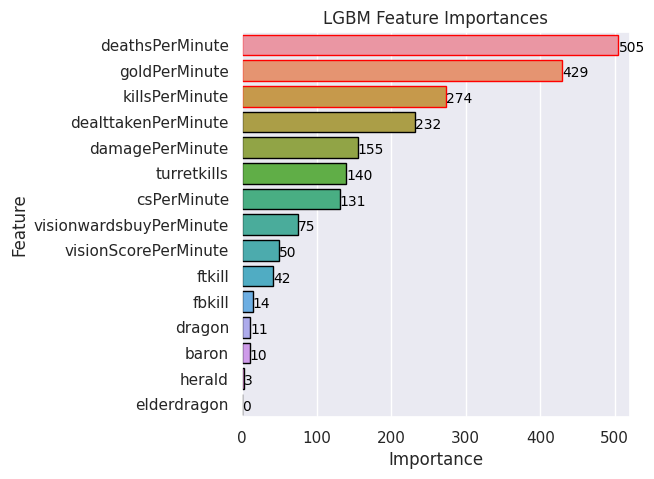

In [ ]:
# lgbm 변수 중요도

feature_importances = lgbm.feature_importances_

# 피처와 그에 따른 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({'Feature': X_scaled_df.columns, 'Importance': feature_importances})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.set(style='darkgrid')
plt.figure(figsize=(5, 5))

# 상위 3개 하이라이트
def kth_largest_number(arr, K):
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse = True)
    return sorted_nums[K-1]

values = importance_df['Importance']
colors = ['black' if (x < kth_largest_number(values,3)) else 'red' for x in values]

barplot = sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'],
            edgecolor = colors)

# 수치 표시
for i, v in enumerate(importance_df['Importance']):
    barplot.text(v + 0.005, i + .25, str(round(v, 3)), color='black', fontweight='light', fontsize=10)

plt.xlim(0, 520)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('LGBM Feature Importances')
plt.show()

로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀
# 로지스틱 회귀 객체 생성 및 학습
# 이 모델은 승패 예측과 같은 이진 분류 문제에 적합하며, 로지스틱 회귀는 선형 결합을 사용하여 결과를 예측하며, 결과를 확률로 반환합니다.

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

# 테스트 세트에 대한 예측 수행
y_pred = log_reg.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(Y_test, y_pred)
print('Test Accuracy: {:.3f} %'.format(accuracy*100))

Test Accuracy: 94.231 %


In [ ]:
print('Coefficients:', log_reg.coef_)
print('Intercept:', log_reg.intercept_)

# h(x) = 1 / (1 + e^-([0.12615177] + [0.17482373]*baron + [2.88339653]*dealt
# + [-2.82814425]*dealttaken + [6.40279077]*kills + [-7.41884392]*deaths
# + [-0.61698048]*dragon + [0.06066212]*ftkill + [0.45970673]*fbkill
# + [-0.30351418]*goldearned + [0.1049977]*herald + [1.84484]*elderdragon
# + [0.56239885]*turretkills + [-2.24086126]*visionscore + [1.17430594]*visionwardsbuy + [-0.44834331]*cs))

# 양수값은 클수록 양수 클래스 (승리)
# 음수값은 클수록 음수 클래스 (패배)

# baron: 0.15004914
# damagePerMinute: -0.41135821
# dealttakenPerMinute: -0.75511225
# killsPerMinute: 2.61877185
# deathsPerMinute: -4.43497745
# dragon: 0.09751238
# ftkill: -0.09541447
# fbkill: 2.94225111
# goldPerMinute: 0.13146507
# herald: 0.21439989
# elderdragon: 1.54957357
# turretkills: -0.71523348
# visionwardsbuyPerMinute: -0.31454591
# visionScorePerMinute: 0.47106488
# csPerMinute: 0.16063479

# y = 0.15004914 * baron - 0.41135821 * damagePerMinute - 0.75511225 * dealttakenPerMinute + 2.61877185 * killsPerMinute
# - 4.43497745 * deathsPerMinute + 0.09751238 * dragon - 0.09541447 * ftkill + 2.94225111 * fbkill + 0.13146507 * goldPerMinute
# + 0.21439989 * herald + 1.54957357 * elderdragon - 0.71523348 * turretkills - 0.31454591 * visionwardsbuyPerMinute + 0.47106488
# * visionScorePerMinute + 0.16063479 * csPerMinute - 0.09013465

# 승리 확률을 구할 수 있다. 답은 로짓변화를 통해 0~1의 값을 가지며 0.5보다 크면 승리로, 0.5보다 작으면 패배로 분류합니다.

Coefficients: [[ 0.15004914 -0.41135821 -0.75511225  2.61877185 -4.43497745  0.09751238
  -0.09541447  2.94225111  0.13146507  0.21439989  1.54957357 -0.71523348
  -0.31454591  0.47106488  0.16063479]]
Intercept: [-0.09013465]


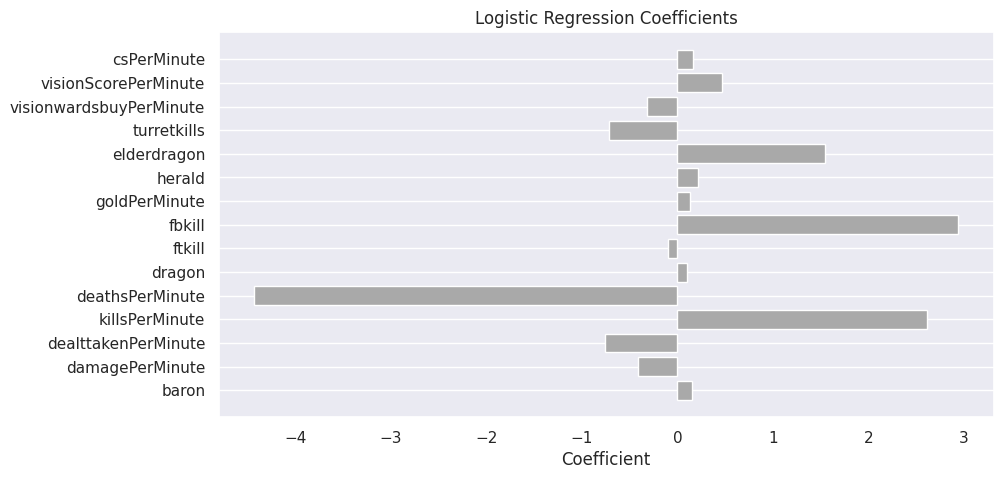

In [ ]:
# 로지스틱 회귀분석의 계수
coefficients = {
    'baron': 0.15004914,
    'damagePerMinute': -0.41135821,
    'dealttakenPerMinute': -0.75511225,
    'killsPerMinute': 2.61877185,
    'deathsPerMinute': -4.43497745,
    'dragon': 0.09751238,
    'ftkill': -0.09541447,
    'fbkill': 2.94225111,
    'goldPerMinute': 0.13146507,
    'herald': 0.21439989,
    'elderdragon': 1.54957357,
    'turretkills': -0.71523348,
    'visionwardsbuyPerMinute': -0.31454591,
    'visionScorePerMinute': 0.47106488,
    'csPerMinute': 0.16063479
}

# 계수의 이름과 값을 리스트로 변환
names = list(coefficients.keys())
values = list(coefficients.values())

# 막대그래프 그리기
plt.figure(figsize=(10, 5))
plt.barh(names, values, color='darkgray')
plt.xlabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')  # x축에 그리드 추가
plt.show()

# , 'killsPerMinute'의 계수가 2.61877185인 것은 'killsPerMinute' 값이 1 증가할 때 로짓 변환된 승리 확률이 약 2.61877185만큼 증가한다는 것을 의미
#  'deathsPerMinute'의 계수가 -4.43497745인 것은 'deathsPerMinute' 값이 1 증가할 때 로짓 변환된 승리 확률이 약 4.43497745만큼 감소

In [ ]:
# 암거나 10개 gogo
test_data = pd.read_csv(path+"data/yh_data.csv")
test_data = test_data[7:17].drop(columns = ["gametime"])

In [ ]:
len(test_data)

10

In [ ]:
# from sklearn.metrics import accuracy_score

# log_reg

# 표준화
scaler = StandardScaler()
X_test_new = test_data.drop('win', axis=1)
Y_test_new = test_data['win']

X_test_new = scaler.fit_transform(X_test_new)
y_pred_new = lgbm.predict(X_test_new)

# 정확도 계산
accuracy_new = accuracy_score(Y_test_new, y_pred_new)
print('Test Accuracy: {:.3f} %'.format(accuracy_new*100))

Test Accuracy: 80.000 %


In [ ]:
# 각 예측에 대한 확률 계산
y_pred_proba = rf.predict_proba(X_test_new)


# 예측값, 실제값, 확률 출력
for i in range(10):
# for i in range(len(Y_test_new)):
    print('예측: {}, 실제: {}\n0 확률: {:.2f}, 1 확률: {:.2f}\n'.format(
        y_pred_new[i], Y_test_new.iloc[i], y_pred_proba[i][0], y_pred_proba[i][1]))

예측: 1, 실제: 0
0 확률: 0.63, 1 확률: 0.37

예측: 0, 실제: 0
0 확률: 0.93, 1 확률: 0.07

예측: 1, 실제: 1
0 확률: 0.00, 1 확률: 1.00

예측: 1, 실제: 1
0 확률: 0.07, 1 확률: 0.93

예측: 0, 실제: 0
0 확률: 0.93, 1 확률: 0.07

예측: 1, 실제: 1
0 확률: 0.07, 1 확률: 0.93

예측: 0, 실제: 0
0 확률: 0.87, 1 확률: 0.13

예측: 0, 실제: 1
0 확률: 0.61, 1 확률: 0.39

예측: 0, 실제: 0
0 확률: 0.59, 1 확률: 0.41

예측: 0, 실제: 0
0 확률: 0.77, 1 확률: 0.23



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
